**Q1. Explain GET and POST methods.**

The GET and POST methods are HTTP request methods used for communication between a client (usually a web browser) and a server.

1. GET method:
   - The GET method is used to request data from a specified resource.
   - It appends the data to the URL as parameters in the form of key-value pairs.
   - It is mainly used for retrieving data and should not be used for sensitive or confidential data, as the parameters are visible in the URL.
   - GET requests can be cached, bookmarked, and shared, as they are visible in the browser's history.

2. POST method:
   - The POST method is used to submit data to be processed to a specified resource.
   - The data is sent in the request body, not as parameters in the URL, making it more secure for sensitive or confidential data.
   - It is commonly used when sending data to a server for processing, like submitting a form on a web page.
   - POST requests are not cached, bookmarked, or shared in the browser's history, making them more suitable for data that should not be exposed.

In summary, the GET method is used for data retrieval, while the POST method is used for data submission. They serve different purposes and have distinct characteristics in terms of data visibility and security.

In [1]:
# requests for making HTTP requests and json for handling JSON data
import requests, json
# threading is used to run the Flask application in a separate thread
from threading import Thread
# Flask is the main class for creating a web application
# request is used to access data from the incoming request
# jsonify is used to send JSON responses
from flask import Flask, request, jsonify

# my Flask application code 
app = Flask(__name__)

# This decorator associates the / URL path with the handle_request function,
# It specifies that the function can handle both GET and POST requests
@app.route("/", methods=["GET", "POST"])
# This function handles the incoming requests based on their methods
def handle_request():
    if request.method == "GET":
        # Your GET request handling code here
        return "This is a GET request."
    elif request.method == "POST":
        # Your POST request handling code here
        data = request.get_json()  # Get the JSON data from the request
        if data is not None:
            # Process the received data
            # For example, print the data
            print(data)
            return jsonify({"message": "Data received successfully."}), 200
        else:
            return jsonify({"message": "Invalid JSON data."}), 400
    else:
        # If the incoming request method is neither GET nor POST
        return jsonify({"message": "Method not allowed."}), 405


# Define a function to start the Flask application in a separate thread
def run_flask_app():
    app.run(host="localhost", port=5000)

# This function is responsible for sending a POST request to a specified URL with JSON data    
def send_post_request(url, data):
    try:
        # Send the POST request with the data provided
        response = requests.post(url, json=data) 
        
        # Check the status code of the response
        if response.status_code == 200:
            # If the request was successful, print the response message
            print(response.json())
        else:
            # If there was an error, print the error message
            print(f"Error: {response.status_code} - {response.json()}")
    except requests.exceptions.RequestException as e:
        # If there was an exception while making the request, print the error message
        print(f"Error: {e}")

if __name__ == "__main__":
    # Example data to be sent in the POST request
    data = {"name": "John", "age": 30}
    
    # Create a thread for running the Flask application
    flask_thread = Thread(target=run_flask_app)
    flask_thread.start()
    
    # Replace the URL with the appropriate endpoint where you want to send the POST request
    url = "http://localhost:5000"
    # Call the function to send the POST request
    send_post_request(url, data)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Aug/2023 22:30:29] "POST / HTTP/1.1" 200 -


{'name': 'John', 'age': 30}
{'message': 'Data received successfully.'}


127.0.0.1 - - [04/Aug/2023 22:30:36] "GET / HTTP/1.1" 200 -


This code sets up a basic `server` and `client` communication where the `server` is running the `Flask` application, and the `client` sends a `POST` request to the server with some `JSON` data. The `server` receives the data and processes it, and then it sends back a `JSON` response indicating the `success` or `failure` of data reception. The `server` is running in a separate thread to ensure it doesn't block the `main program` execution. We can see the `GET` request message if we click the `localhost:500` link

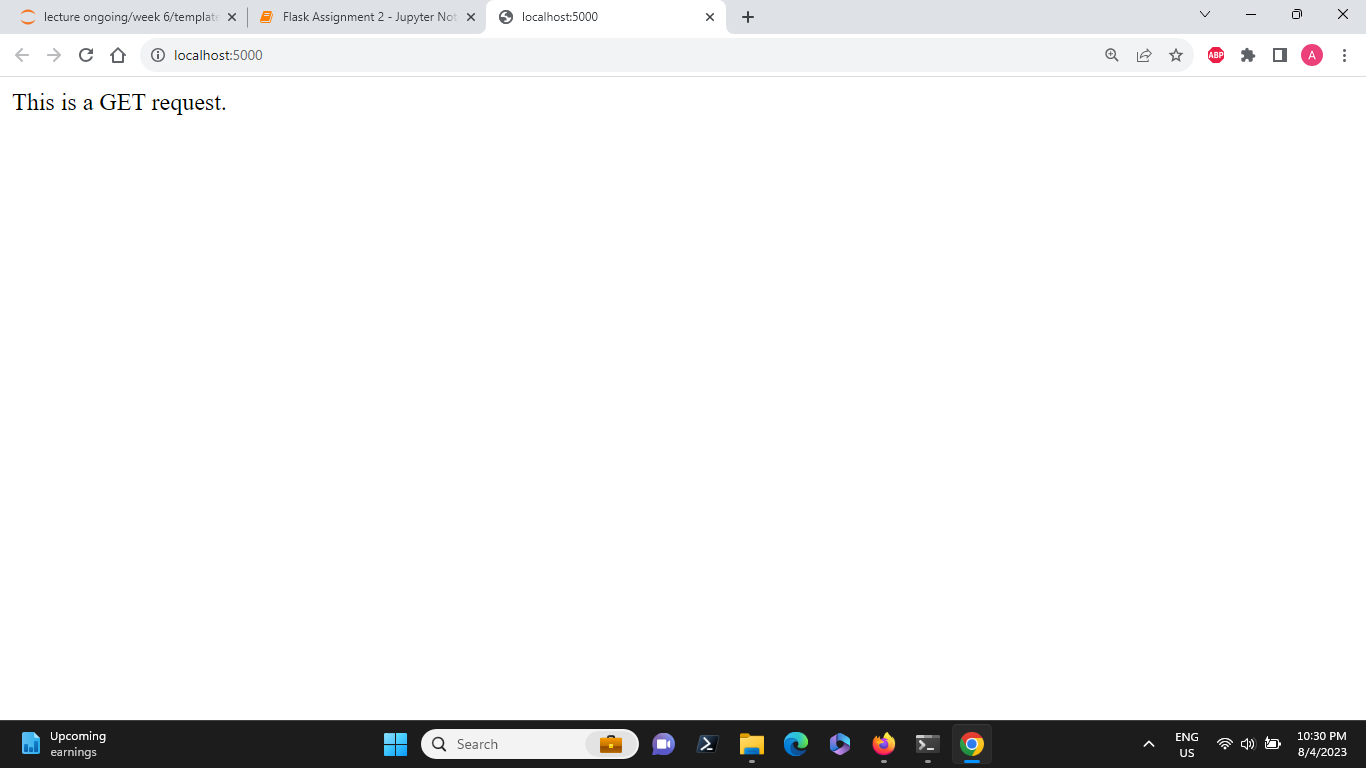

**Q2. Why is request used in Flask?**

The `request` module is used in `Flask` to handle incoming `HTTP` requests from `clients`. It allows the `Flask` application to access data and information sent by the `client` as part of the `request`, such as `query` parameters, `form data`, and `JSON payloads.`

In the provided code, `request` is used to access data from the incoming request in the `handle_request` function. Specifically, in the `POST` request handling code, `request.get_json()` is used to retrieve the `JSON` data sent by the `client` in the `request` body.

The `request` module provides various `attributes` and `methods` to work with the incoming `request` data, making it easier for developers to handle different types of `requests` and extract `relevant information` from them.

**Q3. Why is redirect() used in Flask?**

In Flask, the `redirect()` function is used to perform a `redirect` to a different `URL`. It is commonly used when handling `form submissions` or after `processing data` to redirect the user to a `different` page, typically a `success` or `error` page.

Here's an example of how redirect() can be used in a Flask route:

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def index():
    # Some processing logic here...  
    # Let's assume we are receiving JSON data from the client.
    # For demonstration purposes, we'll simulate processing the data
    # by simply printing it.
    # Assuming the client sent JSON data with key "name"
    data = {"name": "John Doe"}
    
    # Process the data
    name = data.get("name")
    
    # Print the received data (processing logic)
    print("Received data from the client:", name)
    # Redirect to the success page after processing.
    return redirect(url_for('success'))

@app.route('/success')
def success():
    # click on the link "localhost:5000" 
    # we will redirect to success page to see the below message 
    return 'Success! Your data was processed successfully.'

# start the Flask application
if __name__ == '__main__':
    app.run(host="localhost", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Aug/2023 22:32:50] "GET / HTTP/1.1" 302 -
127.0.0.1 - - [04/Aug/2023 22:32:50] "GET /success HTTP/1.1" 200 -


Received data from the client: John Doe


We can see the `success` page in the below image:
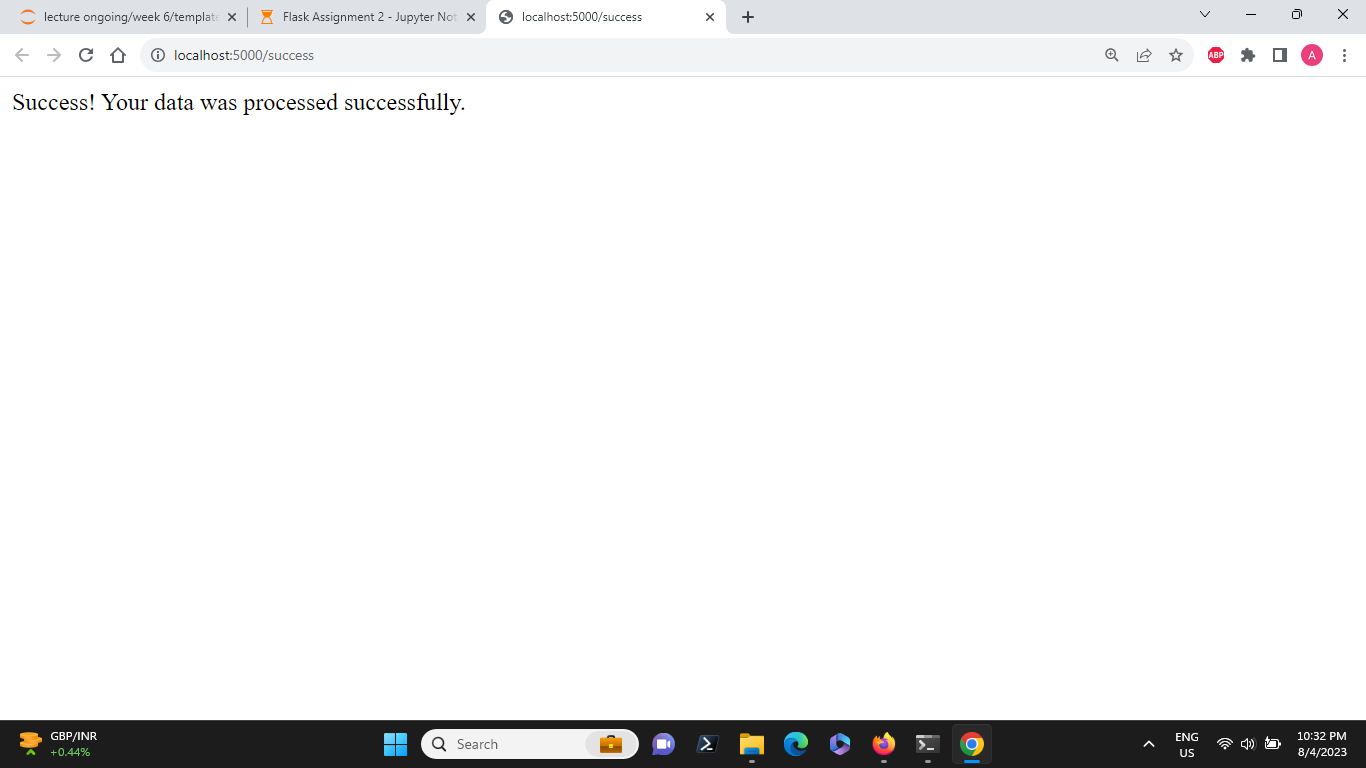

**Q4. What are templates in Flask? Why is the render_template() function used?**

In Flask, `templates` are used to separate the `presentation layer` from the `business logic`. `Templates` allow you to create `dynamic HTML` pages by embedding placeholders, called `variables` or `expression`s, that are replaced with actual `data` when the page is rendered. This enables you to build web pages with `dynamic` content and maintain a clear distinction between the `logic` and the `presentation.`

The `render_template()` function is used to render these `templates` in `Flask.` It takes the name of the template file as an `argument` and returns the rendered `HTML` content. This function is typically used within a `Flask` route handler to render the `HTM`L template and `dynamically` inject data into it before sending it to the `client's web browser.`

Assume we have a template file named `hello.html` in the `templates` folder.
The template may look like this:
```html
<html>
  <body>
     <h1>Hello, {{ name }}!</h1>
  </body>
</html>
```

Here's an example of how you can use the `render_template()` function in your `Flask` application:

In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def index():
    # render_template() function is used to render the "hello.html" template
    # It injects the value of the name variable into the template, replacing {{ name }} with the actual value "John Doe"
    # The rendered HTML will then be sent to the client's browser, displaying the message "Hello, John Doe!
    name = "John Doe"
    return render_template('hello.html', name=name)

# start the Flask application
if __name__ == '__main__':
    app.run(host="localhost", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Aug/2023 22:35:30] "GET / HTTP/1.1" 200 -


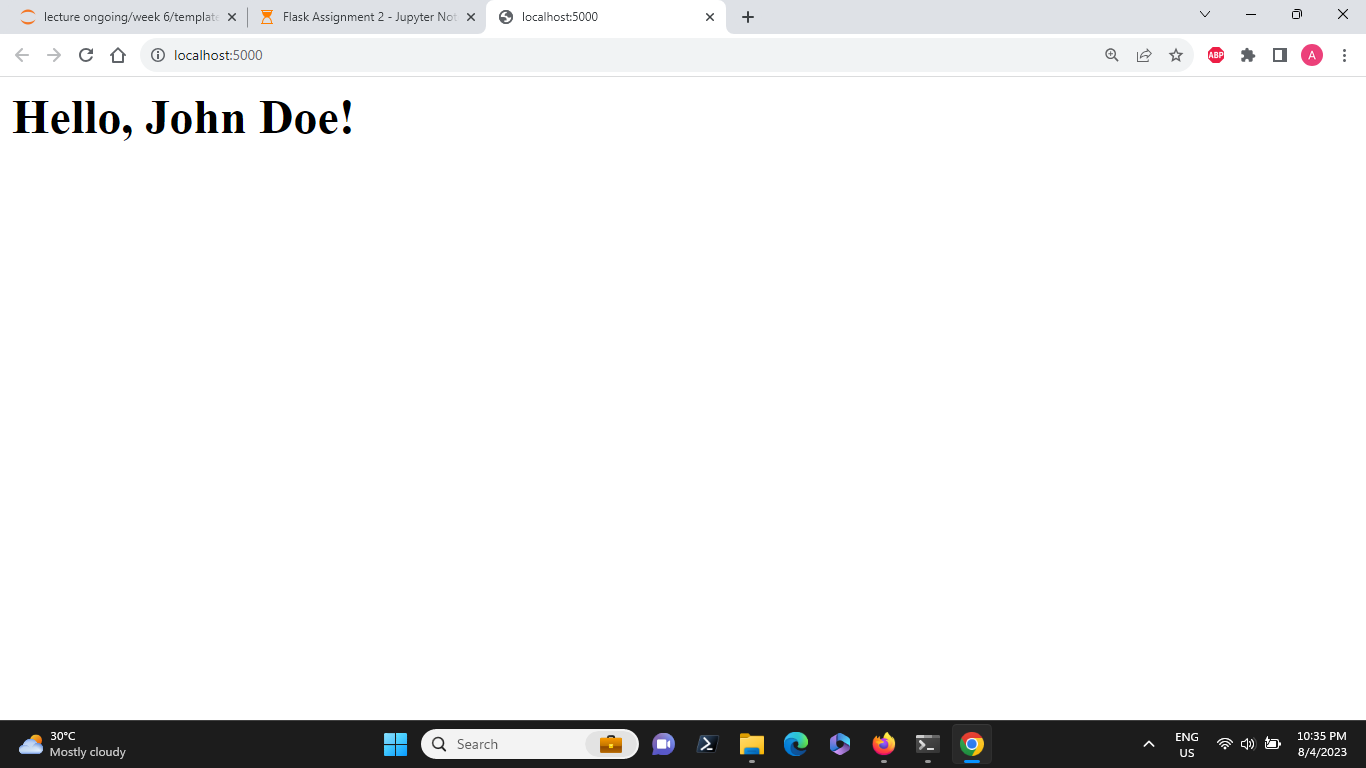

**Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.**

In [ ]:
from flask import Flask, jsonify

# Create a Flask application
app = Flask(__name__)

# Define a route for the API endpoint "/api/hello" with the method "GET"
@app.route('/api/hello', methods=['GET'])
def hello():
    # Create a dictionary containing the response message
    data = {'message': 'Hello, API!'}
    # Convert the dictionary to JSON format and return it as the API response
    return jsonify(data)

# Check if this script is being run directly (not imported as a module)
if __name__ == '__main__':
    # Start the Flask application and listen on localhost:5000
    app.run(host="localhost", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Aug/2023 22:36:49] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [04/Aug/2023 22:37:03] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [04/Aug/2023 22:37:10] "GET /api/hello HTTP/1.1" 200 -


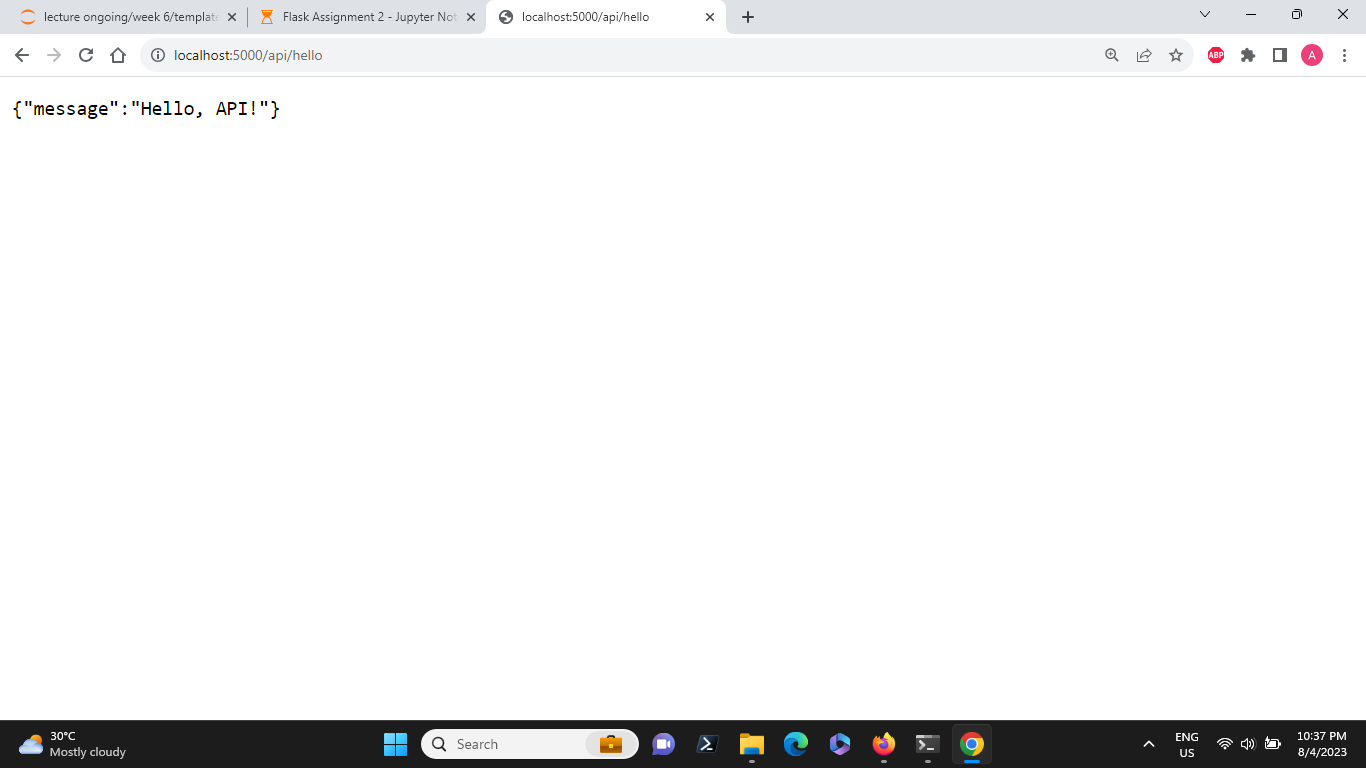

To test this `API` using `Postman` <https://web.postman.co/workspace/My-Workspace~8a22ff1d-f577-4cf5-86ed-5a7252a58c14/request/create?requestId=45a95b40-5e26-453d-8321-bfe23dbbdfff>, we can follow these steps:

`Make sure that my `Flask` application is running by executing the script.
- Open `Postman` and create a `new` request.
- Set the request type to `GET.`
- Enter the URL http://localhost:5000/api/hello
- Click the `Send` button to make the request.
- We should receive a `JSON` response with the message `Hello, API!`.

Look at the output screenshot using `Postman` to test the API:

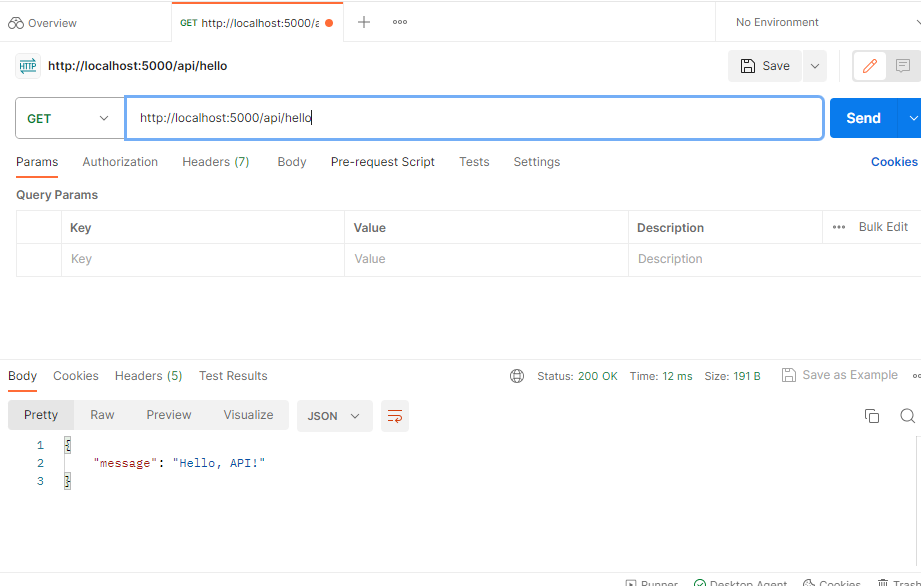